# 11. Virtual Memory

Recall: Memory is **Byte Adrressible** --> Every address is **an index to memory**

<mark>Memory Management Unit (MMU)</mark>: The actual unit that does the memory mapping between virtual memory and physical memory

<mark>Segmentation</mark>: separate memory into segments (blocks of code) ..... No longer used
- Each segments contains: base, limit, permission (checked by MMU)
- Get physical address by using: `segment selector:offset`

> For example 0×1:0xFF with segment 0×1 base = 0×2000, limit = 0×1FF
> --> Translates to 0×20FF

Note: Linux sets every base to 0, and limit to the maximum amount

### First Insight: Divide Memory into Fixed-Sized Pages (4096 bytes)

EACH PAGE:

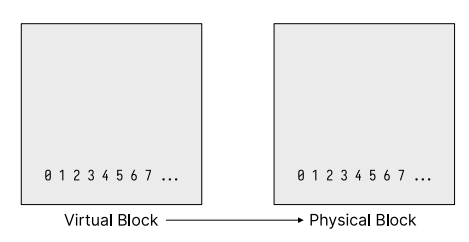

- A page in virtual memory is called a **page**
- A page in physical memory is called a **frame**

We’ll assume a **39 bit virtual address space** (instead of 64 bits) used by RISC-V and other architectures = 512GB addressible memory

Remember that virtual address space is for each process, so why would your process use more than 512GB of memory :)

- Implemented with a page table indexed by <mark>Virtual Page Number (VPN)</mark>
- Looks up the <mark>Physical Page Number (PPN)</mark>

NOTE: Each entry is **Page Table Entry**, with Offset --> **one address**

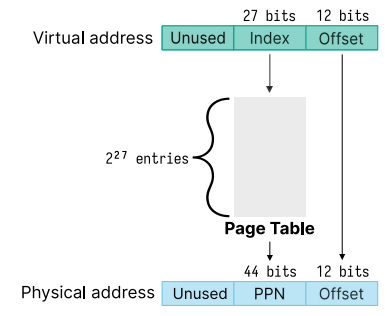

#### <mark>Page Table Entry (PPE)</mark>

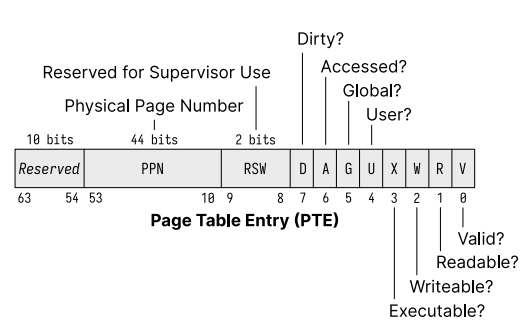

(Notice that 44 bits are later used as PPN)

### Kernel Handles Translating Virtual Addresses

Considering the following page table:

VPN PPN  
0x0 0x1  
0x1 0x4  
0x2 0x3  
0x3 0x7  

We would get the following virtual → physical address translations:

0x0AB0 → 0x1AB0  
0x1FA0 → 0x4FA0  
0x2884 → 0x3884  
0x32D0 → 0x72D0  (Since 12 bits for offset)

### Page Translation Example

Assume you have a 8-bit virtual address, 10-bit physical address, each page is 64 bytes

How many virtual pages are there?

> There are 2^8 virtual addresses, each page has 2^6 addresses (each byte = 1 address) --> 2^2 = 4 virtual pages

How many physical pages are there?

> There are 2^10 physical addresses --> 2^4 = 16 physical pages

How many entries are in the page table?

> Each page 64 bytes --> Offset will index the entry in each page --> 6 bits (2^6 = 64)  
> --> 8 - 6 = 2 bits for VPN  
> Each 2 bits for VPN indexing --> 4 entries

Given the page table is [0x2, 0x5, 0x1, 0x8], what’s the physical address of 0xF1?

> 0xF1 translate to 11110001  
> Offset: 110001  
> Index to table: 11 (3) --> 0x8 = 1000
> Physical address: 1000110001 = 0x231


### Each Process Gets Its Own Page Table

When you fork a process, it will copy the page table from the parent (but still split off from the parent)

#### PROBLEM: Page table is 2^27 entries, each entry is 2^3 bytes (64 bits) --> Each page table is 1GiB --> HUGE

Note that RISC-V translates a 39-bit virtual to a 56-bit physical address  
It has 10 bits to spare in the PTE and could expand

In the “Subprocess” lecture, we’re doing a `fork` followed by `exec`  
why do we need to copy the page tables? (if I'm going to a different program anyway)

--> There’s a system call for that — `vfork`

This means sharing all memory with parent (undefined behaviour if modifying anything)
--> Only is used for immediately `exec` right after, to move to a different program